# Лабораторная работа 2

## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ — столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_k$ — столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_k$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением — то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_k$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).
На лекциях было показано, что в этом случае проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$ записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N — количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k.$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени — это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ — это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обучение и тест 

После того как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2.$$

В целом хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям, в чём вам предстоит убедиться в ходе выполнения этой лабораторной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Правила оформления графиков
При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна библиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это надстройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

При выполнении этой лабораторной вы столкнётесь с необходимостью рисовать большое количество графиков. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

### Задание 1. Метод наименьших квадратов (3 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором — тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом — $n$ точек (значения аргумента $x$), во втором — значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача — по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [145]:
import numpy as np
data_train = np.loadtxt('train.txt', delimiter=',')
data_test = np.loadtxt('test.txt', delimiter=',')

**0. [0 баллов]** Разделим значения $x$ и $y$:

In [146]:
X_train = np.array(data_train[:,0])
y_train = np.array(data_train[:,1])

X_test = np.array(data_test[:,0])
y_test = np.array(data_test[:,1])

**1. [0.1 балла]** Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``). Напечатайте этот многочлен в виде $kx+b$.

Заметим, что в данном случае для каждой выборки мы имеем СЛУ следующего вида:
\begin{cases}
    x1*k + b = y1 \\
    ... \\
    x21*k + b = y21 
\end{cases}  

То есть здесь k, b выступают в качестве неизвестных; матрица, стотоящая из столбца иксов (коэффициенты при k) и столбца единиц (коэффициенты при b) - матрица коэффициентов (далее - А); столбец игреков - столбец правых частей (далее - у). Искомое псевдорешение $result_{1}$ - это столбец из 2 чисел: k и b.

Очевидно, что в обеих выборках столбцы в матрице коэффициентов ЛНЗ (т.к. они непропорциональны), поэтому для нахождения $result_{1}$ мы можем воспользоваться следующей формулой: $result1=(А^TA)^{-1}*A^Ty$.

In [181]:
#Сначала импортируем нужные библиотеки и создадим список аргументов для дальнейшего построения функций
import matplotlib.pyplot as plt
x_funcs = np.linspace(-0.3, 1.1, 5000)

#Также напишем несколько вспомогательных функций, чтобы не переписывать один и тот же код для разных значений 
#(степеней многочленов, количества переменных и т.д.) несколько раз.

#Функция, которая принимает список иксов, список игреков и степень многочлена
#Она "склеивает" матрицу А из столбцов коэффициентов и затем находит result по формуле: result=(А^T*A)^(-1)A^T*mass_y.
def count_result_ord(mass_x, mass_y, k): 
    A=np.vander(mass_x, k+1, increasing=True)
    temp = np.dot(np.linalg.inv(np.dot(np.transpose(A), A)), np.transpose(A))
    result=np.dot(temp, np.transpose(mass_y))
    return result

#Функция, которая принимает список коэффициентов многочлена и список некоторых аргументов, значения многочлена в которых мы хотим знать
#Для каждого аргумента из списка она считает значение многочлена и возвращает список этих значений
def count_poly(coeffs, args):
    values = []
    for arg in args:
        num = coeffs[0]
        for i in range(1, len(coeffs)):
            num+=coeffs[i]*arg**i
        values.append(num)
    return values

#Функция, которая принимает список коэффициентов многочлена
#Она распечатывает многочлен в виде a0 + a1*x + a2*x^2 +...+ak*x^k (далее - каконический вид)
def print_poly(coeffs):
    print("y =", coeffs[0], end="")
    for i in range(1, len(coeffs)):
        if coeffs[i]<0:
            print(" ", coeffs[i],"x^", i, sep="", end=" ")
        else:
            print(" + ", coeffs[i],"x^", i, sep="", end=" ")

In [182]:
result1=count_result_ord(X_train, y_train, 1) #Нашли список коэффициентов для многочлена 1 степени
print_poly(result1) #Распечатали многочлен в каноническом виде

y = 4.433230905064935 + 2.2791344980519463x^1 

**2. [0.15 балла]** Нарисуйте на плоскости точки $(x_i, y_i)$ из обеих выборок и полученную линейную функцию.

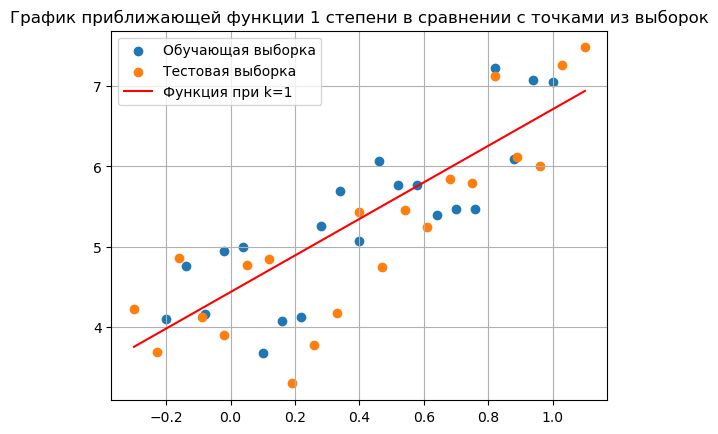

In [189]:
plt.grid()

plt.scatter(X_train, y_train, label='Обучающая выборка')
plt.scatter(X_test, y_test, label='Тестовая выборка')

y1=count_poly(result1, x_funcs)
plt.plot(x_funcs, y1, 'r', label='Функция при k=1')

plt.legend()
plt.title('График приближающей функции 1 степени в сравнении с точками из выборок')
new_line1.set_xlabel('x')
new_line1.set_ylabel('y')
plt.show()

**3. [0.15 балла]** Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию с точки зрения минимизации среднеквадратичной ошибки на обучающей выборке. Найдите этот многочлен и напечатайте его в виде $a_0 + a_1 x + \ldots a_k x^k$.

Если нам дана 21 точка в обучающей выборке, то по ней можно построить многчлен 20 степени (это будет интерполяционный многочлен Лагранжа), которому все эти точки будут принадлежать - тогда сумма квадратов расстояний от этого графика до точек обучащей выборки будет равна 0, и среднеквадратическая ошибка на обучающей выборке будет минимально возможной - нулевой. 

In [190]:
A20 = np.vander(X_train, 21, increasing=True) #Нашли матрицу коэффициентов для многочлена 20 степени
result20 = np.linalg.solve(A20, y_train) #Решили СЛУ А20*result20=y_train
print_poly(result20)        

y = 3.2198212073744474 -0.7934473899046472x^1  + 3260.4637778196425x^2  -58867.240661819786x^3  -169067.10669174208x^4  + 10708719.92872819x^5  -75691172.68610269x^6  -103858343.78396732x^7  + 4012760800.9441314x^8  -21352270537.71068x^9  + 27204873087.42153x^10  + 233200216646.85034x^11  -1538319841212.246x^12  + 4924891614005.559x^13  -10211930297241.357x^14  + 14703318890042.812x^15  -14928343508536.984x^16  + 10533103186600.682x^17  -4929265320618.095x^18  + 1378024201395.6936x^19  -174375438958.5206x^20 

**4. [0.1 балла]** Нарисуйте его график на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок.

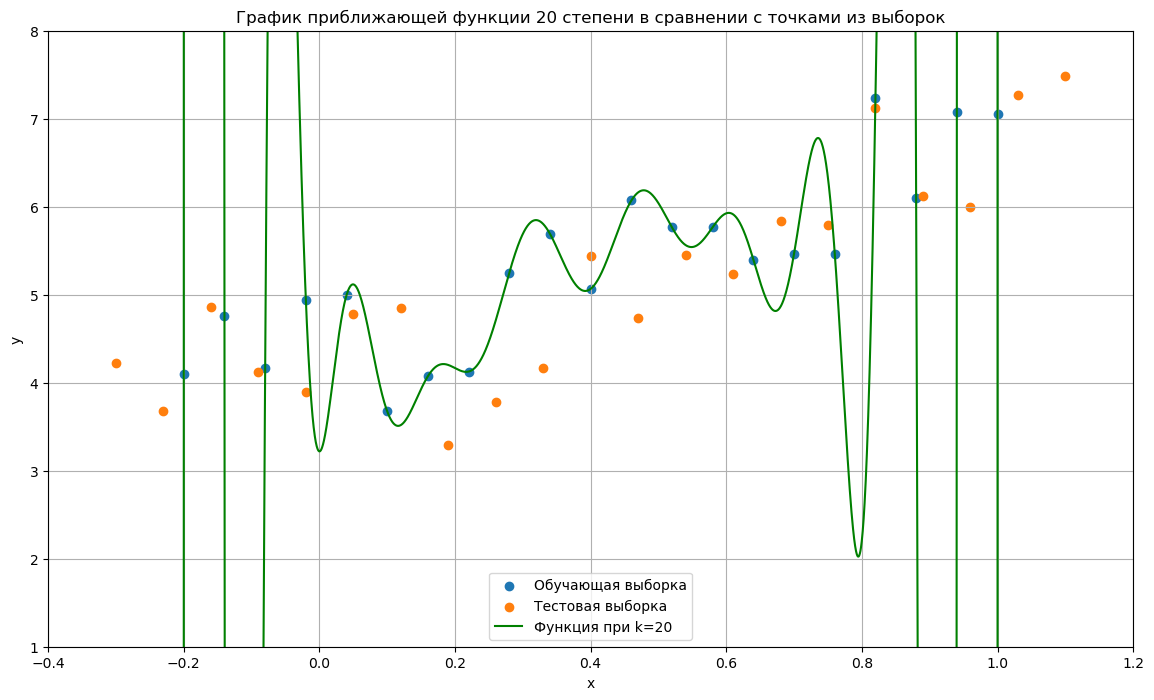

In [191]:
plt.figure(figsize=(14, 8))
plt.grid()

plt.scatter(X_train, y_train, label='Обучающая выборка')
plt.scatter(X_test, y_test, label='Тестовая выборка')

y20=count_poly(result20, x_funcs)
plt.plot(x_funcs, y20, 'g', label='Функция при k=20')

plt.legend()
plt.title('График приближающей функции 20 степени в сравнении с точками из выборок')
plt.xlabel('x')
plt.ylabel('y')

plt.xlim(-0.4, 1.2)
plt.ylim(1, 8)
plt.show()

**5. [0.25 балла]** Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Напечатайте найденные многочлены в виде $a_0 + a_1 x + \ldots a_k x^k$.

In [192]:
#Для k=1 такой многочлен уже найден
#k=2
result2=count_result_ord(X_train, y_train, 2) #Нашли список коэффициентов для многочлена 2 степени
print_poly(result2) #Распечатали многочлен в какноническом виде

y = 4.472476503404162 + 1.1578316883597481x^1  + 1.4016285121152738x^2 

In [193]:
#k=3
result3=count_result_ord(X_train, y_train, 3) #Нашли список коэффициентов для многочлена 3 степени
print_poly(result3) #Распечатали многочлен в какноническом виде

y = 4.4607363552851425 + 1.065016105285058x^1  + 1.8597508372613332x^2  -0.38176860428826x^3 

In [194]:
#k=4
result4=count_result_ord(X_train, y_train, 4) #Нашли список коэффициентов для многочлена 4 степени
print_poly(result4) #Распечатали многочлен в какноническом виде

y = 4.341166120398974 + 1.171802392634403x^1  + 6.794091784357896x^2  -13.051328119992206x^3  + 7.918474697316007x^4 

In [195]:
#k=5
result5=count_result_ord(X_train, y_train, 5) #Нашли список коэффициентов для многочлена 5 степени
print_poly(result5) #Распечатали многочлен в какноническом виде

y = 4.431297813818277 -0.13059803989036212x^1  + 3.2747144018600167x^2  + 21.374796276237063x^3  -51.13148138545856x^4  + 29.524978041388295x^5 

In [196]:
#k=6
result6=count_result_ord(X_train, y_train, 6) #Нашли список коэффициентов для многочлена 6 степени
print_poly(result6) #Распечатали многочлен в какноническом виде

y = 4.383795010995512 -4.597179325133645x^1  + 16.002903989918615x^2  + 121.25709713212586x^3  -481.51013288793615x^4  + 581.453298243664x^5  -229.97013341826778x^6 

In [197]:
#k=7
result7=count_result_ord(X_train, y_train, 7) #Нашли список коэффициентов для многочлена 7 степени
print_poly(result7) #Распечатали многочлен в какноническом виде

y = 4.444512707325783 -4.008895914050697x^1  + 7.215458625626539x^2  + 119.35078422146287x^3  -314.23117230246x^4  + 122.87821665246247x^5  + 238.69936824883825x^6  -167.38196488774565x^7 

In [198]:
#k=8
result8=count_result_ord(X_train, y_train, 8) #Нашли список коэффициентов для многочлена 8 степени
print_poly(result8) #Распечатали многочлен в какноническом виде

y = 4.663789159674868 -5.182773520022789x^1  -26.695632102178987x^2  + 268.8604433094429x^3  + 109.89567721382991x^4  -3132.8564583224143x^5  + 6760.628597582669x^6  -5701.710301341856x^7  + 1729.4776048747271x^8 

In [199]:
#k=9
result9=count_result_ord(X_train, y_train, 9) #Нашли список коэффициентов для многочлена 9 степени
print_poly(result9) #Распечатали многочлен в какноническом виде

y = 4.645883993965888 -4.552702596784918x^1  -24.26272776486809x^2  + 219.04207291653483x^3  + 176.24535601817024x^4  -2441.962881503714x^5  + 3913.2689826863207x^6  -1216.4495727131434x^7  -1522.0972997463396x^8  + 903.2152438587582x^9 

In [200]:
#k=10
result10=count_result_ord(X_train, y_train, 10) #Нашли список коэффициентов для многочлена 10 степени
print_poly(result10) #Распечатали многочлен в какноническом виде

y = 4.669178404356777 -2.159966972842014x^1  -36.175223906865x^2  + 44.93568728213995x^3  + 1201.9531437004407x^4  -1660.823300779426x^5  -12969.950330921303x^6  + 46686.7004507517x^7  -63621.06289403839x^8  + 40177.57295275884x^9  -9818.588864019664x^10 

**6. [1 балл]** Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором — по парам из тестовых данных).

In [201]:
#Напишем функцию для подсчета ошибок на обучающих и тестовых данных
#Функция принимает список иксов, список игреков и список коэффициентов нашего многочлена
#Внутри она вызывает функцию count_poly, подсчитывает значения найденного нами полинома на точках из списка иксов 
#и суммирует квадраты разностей полученных значений с фактическими игреками

def count_mist(mass_x, mass_y, coeffs):
    mist = 0
    y_found=count_poly(coeffs, mass_x)
    for i in range(0, len(mass_y)):
        mist+=(mass_y[i]-y_found[i])**2
    mist/=len(mass_y)
    return mist

In [203]:
print("Ошибка на обучающих данных при k=1 равна", count_mist(X_train, y_train, result1))
print("Ошибка на тестовых данных при k=1 равна", count_mist(X_test, y_test, result1))
print('\n')
print("Ошибка на обучающих данных при k=2 равна", count_mist(X_train, y_train, result2))
print("Ошибка на тестовых данных при k=2 равна", count_mist(X_test, y_test, result2))
print('\n')
print("Ошибка на обучающих данных при k=3 равна", count_mist(X_train, y_train, result3))
print("Ошибка на тестовых данных при k=3 равна", count_mist(X_test, y_test, result3))
print('\n')
print("Ошибка на обучающих данных при k=4 равна", count_mist(X_train, y_train, result4))
print("Ошибка на тестовых данных при k=4 равна", count_mist(X_test, y_test, result4))
print('\n')
print("Ошибка на обучающих данных при k=5 равна", count_mist(X_train, y_train, result5))
print("Ошибка на тестовых данных при k=5 равна", count_mist(X_test, y_test, result5))
print('\n')
print("Ошибка на обучающих данных при k=6 равна", count_mist(X_train, y_train, result6))
print("Ошибка на тестовых данных при k=6 равна", count_mist(X_test, y_test, result6))
print('\n')
print("Ошибка на обучающих данных при k=7 равна", count_mist(X_train, y_train, result7))
print("Ошибка на тестовых данных при k=7 равна", count_mist(X_test, y_test, result7))
print('\n')
print("Ошибка на обучающих данных при k=8 равна", count_mist(X_train, y_train, result8))
print("Ошибка на тестовых данных при k=8 равна", count_mist(X_test, y_test, result8))
print('\n')
print("Ошибка на обучающих данных при k=9 равна", count_mist(X_train, y_train, result9))
print("Ошибка на тестовых данных при k=9 равна", count_mist(X_test, y_test, result9))
print('\n')
print("Ошибка на обучающих данных при k=10 равна", count_mist(X_train, y_train, result10))
print("Ошибка на тестовых данных при k=10 равна", count_mist(X_test, y_test, result10))


Ошибка на обучающих данных при k=1 равна 0.29689663326251964
Ошибка на тестовых данных при k=1 равна 0.4351202004048878


Ошибка на обучающих данных при k=2 равна 0.2696989158766913
Ошибка на тестовых данных при k=2 равна 0.35647628878312543


Ошибка на обучающих данных при k=3 равна 0.26949718714796095
Ошибка на тестовых данных при k=3 равна 0.3553464571518671


Ошибка на обучающих данных при k=4 равна 0.26106653305792743
Ошибка на тестовых данных при k=4 равна 0.44172701892836


Ошибка на обучающих данных при k=5 равна 0.2499850464831752
Ошибка на тестовых данных при k=5 равна 0.5579732021610808


Ошибка на обучающих данных при k=6 равна 0.18829348988370073
Ошибка на тестовых данных при k=6 равна 2.5816929331826204


Ошибка на обучающих данных при k=7 равна 0.18539621153294225
Ошибка на тестовых данных при k=7 равна 2.5157828938037237


Ошибка на обучающих данных при k=8 равна 0.1590555657908716
Ошибка на тестовых данных при k=8 равна 4.3572889280473985


Ошибка на обучающих данных п

**7. [0.75 балла]** Для $k = 1,2,3,4,5,6$ нарисуйте графики полученных многочленов на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

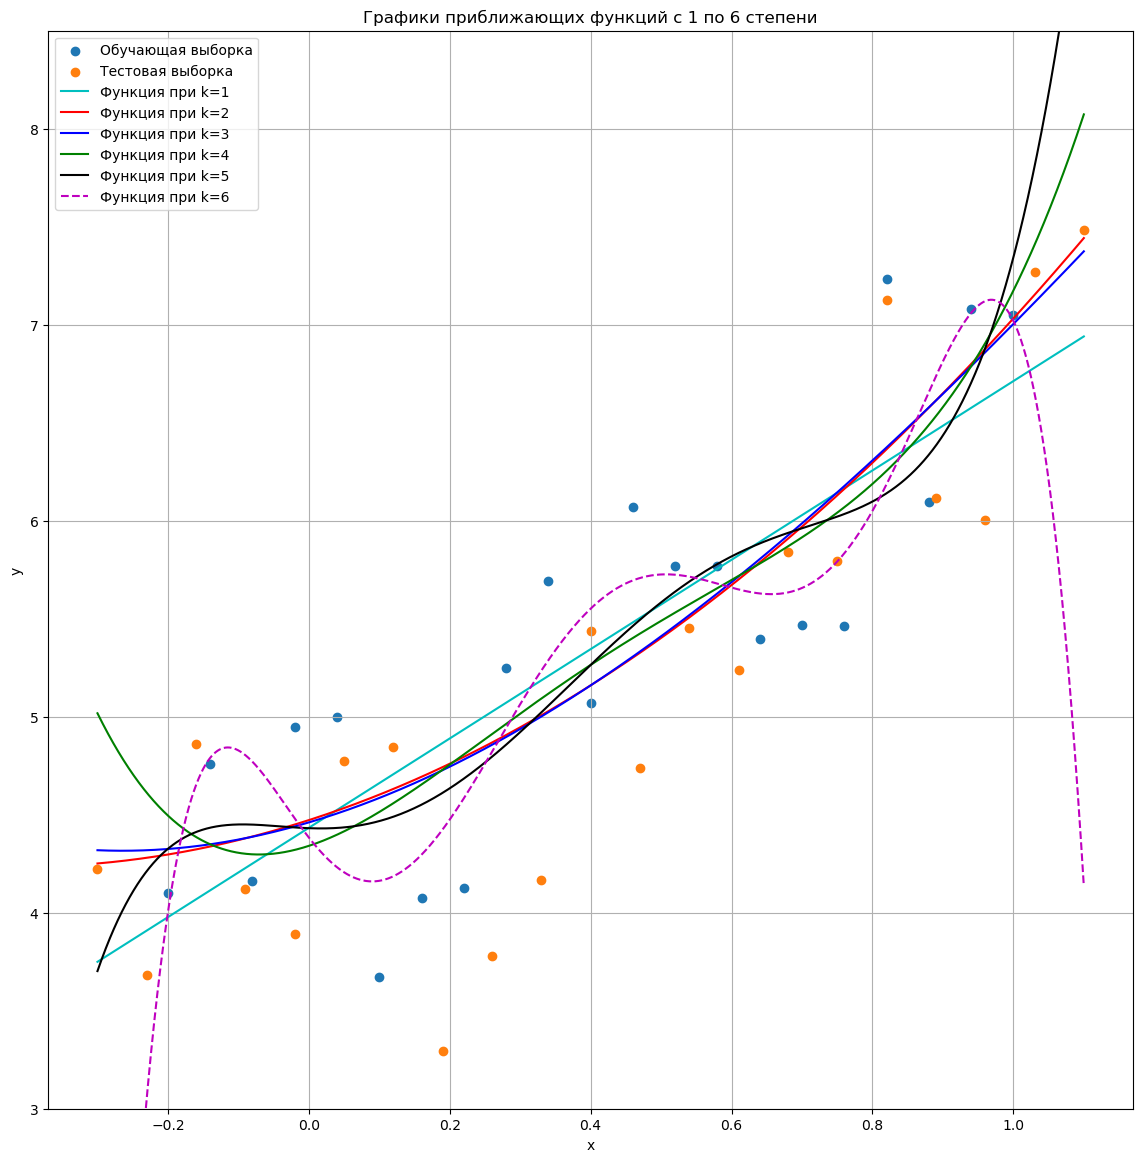

In [213]:
plt.figure(figsize=(14, 14))
plt.grid()

plt.scatter(X_train, y_train, label='Обучающая выборка')
plt.scatter(X_test, y_test, label='Тестовая выборка')

#k=1
plt.plot(x_funcs, y1, 'c', label='Функция при k=1')

#k=2
y2=count_poly(result2, x_funcs)
plt.plot(x_funcs, y2, 'r', label='Функция при k=2')

#k=3
y3=count_poly(result3, x_funcs)
plt.plot(x_funcs, y3, 'b', label='Функция при k=3')

#k=4
y4=count_poly(result4, x_funcs)
plt.plot(x_funcs, y4, 'g', label='Функция при k=4')

#k=5
y5=count_poly(result5, x_funcs)
plt.plot(x_funcs, y5, 'k', label='Функция при k=5')

#k=6
y6=count_poly(result6, x_funcs)
plt.plot(x_funcs, y6, 'm--', label='Функция при k=6')

plt.ylim(bottom=3)
plt.ylim(top=8.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графики приближающих функций с 1 по 6 степени')
plt.legend()
plt.show()

**8. [0.5 балла]** Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$? Как, по вашему мнению, в машинном обучении называется наблюдаемый вами эффект?

При росте степени многчлена ошибка на обучающих данных уменьшается, а на тестовых увеличивается.
В машинном обучении данный эффект называется эффектом переобучения: это явление, при котором полученная модель хорошо иллюстрирует обучающую выборку и соответствует ее логике, но на тестовых данных работает плохо, не объясняет их.

Так, в частности, при k=10 функция очень сложная и хорошо приближенная к обучающей выборке. Однако она дает наибольшую ошибку на тестовых данных в силу переобученности на обучающих.

### Задание 2. Линейная регрессия (3.5 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков.

**0. [0 баллов]** Разделите выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split` с параметром `test_size=0.3`. Не забудьте зафиксировать параметр `random_state`.

In [217]:
#Введем обозначения: P - price, T - totsp, L - livesp, K - kitsp, D - dist, M - metrdist; params - обобщение для T, L, K, D, M
from sklearn.model_selection import train_test_split

data_flats = np.loadtxt('flats_moscow_mod.txt', delimiter='\t', skiprows=1)
params = np.array(data_flats[:,1:])
P = np.array(data_flats[:,0])

X_ftrain, X_ftest, y_ftrain, y_ftest = train_test_split(params, P, test_size=0.3, random_state=42)

In [220]:
#Сначала напишем вспомогательные функции, чтобы не переписывать один и тот же код для разных значений несколько раз

#Функция, которая принимает матрицу коэффициентов и список цен
#Она находит result_flats по формуле: result_flats=(А^T*A)^(-1)A^T*prices.
def count_result_flats(A, prices): 
    fones=np.ones(len(A))
    A=np.column_stack([fones, A])
    temp = np.dot(np.linalg.inv(np.dot(np.transpose(A), A)), np.transpose(A))
    result=np.dot(temp, np.transpose(prices))
    return result

#Функция, которая принимает список коэффициентов найденной функции и список наборов (матрицу) некоторых аргументов, 
#значения функции в которых мы хотим знать
#Для набора аргументов она считает значение функции и возвращает список этих значений
def count_func(coeffs, args):
    values = []
    for i in range(0, len(args)):
        num=coeffs[0]
        for j in range(1, len(coeffs)):
            num+=args[i][j-1]*coeffs[j]
        values.append(num)
    return values

#Функция, которая принимает список коэффициентов функции
#Она распечатывает функцию в виде a0 + a1*T + a2*L + a3*K + a4*D + a5*M + {дополнительные параметры, которые будут введены позже}
def print_func(coeffs):
    print("P =", coeffs[0], end="")
    args=['empty','T', 'L', 'K', 'D', 'M', 'KR', 'LR', 'DR']
    for i in range(1, len(coeffs)):
        if coeffs[i]<0:
            print(" ", coeffs[i], args[i], sep="", end=" ")
        else:
            print(" + ", coeffs[i], args[i], sep="", end=" ")
            
#Также напишем функцию для подсчета ошибок
#Функция принимает список иксов, список игреков и список коэффициентов нашей функции
#Внутри она вызывает функцию count_func, подсчитывает значения найденной нами функции на точках из списка иксов 
#и суммирует квадраты разностей полученных значений с фактическими игреками

def count_mist_flats(mass_x, mass_y, coeffs):
    fmist = 0
    y_found=count_func(coeffs, mass_x)
    for i in range(0, len(mass_y)):
        fmist+=(mass_y[i]-y_found[i])**2
    fmist/=len(mass_y)
    return fmist                        

**1. [0.5 балла]** Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами. С помощью известных вам формул найдите регрессионные коэффициенты. Выпишите построенную модель.

In [221]:
fresult=count_result_flats(X_ftrain, y_ftrain)
print_func(fresult)

P = -8.10090029476007 + 1.5949749963769102T  + 1.060338977103623L  + 2.069049913434752K  -3.411989513822819D  -1.3861215319193887M 

**2. [0.25 балла]** Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Если некоторая характеристика квартиры делает жизнь людей удобнее, приятнее, легче, то коэффициент при соответствующем параметре положителен: это свойство повышает готовность людей платить за квартиру (т.е. спрос людей на эту квартиру) и, соответственно, повышает ее рыночную цену. В нашей модели это относится к общей площади, жилой площади, площади кухни (чем они больше, тем больше цена).

Если же какая-то характеристика квартиры наоборот затрудняет жизнь людей, то коэффициент при соответствующем параметре отрицателен: это свойство понижает готовность людей платить за квартиру и, соответственно, снижает ее рыночную цену. В нашей модели это относится к расстоянию от центра и к расстоянию от метро (чем они больше, тем меньше цена).

Полученные коэффициенты согласуются с представлениями о жизни, потому что обычно человек хочет жить в большой квартире с большой кухней, поближе к центру и к метро.

**3. [0.25 балла]** Оцените качество приближения, вычислив среднеквадратическую ошибку на тестовой выборке.

In [222]:
print("Среднеквадратическая ошибка на тестовой выборке сотавляет", count_mist_flats(X_ftest, y_ftest, fresult))

Среднеквадратическая ошибка на тестовой выборке сотавляет 1226.781421040967


### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению.

**4. [0.25 балла]** Опишите признаки, которые вы решили добавить. Объясните, чем был мотивирован выбор именно этих признаков.

Добавим некоторые комбинации имеющихся параметров, введя несколько условий, которые обычно выполняются в реальной жизни.

Во-первых, пусть нашим эталоном будет следующее соотношение: площадь кухни должна составлять около 40% от общей площади квартиры. Это согласуется со здравым смыслом: кухня должна быть довольно просторной, потому что на ней происходит значительная доля повседневной жизни. 

При этом, чем дальше кухня от идеала, тем сильнее неудобство жильцов (либо кухня такая крошечная, что на ней вообще невозможно готовить, либо площадь кухни сильно отнимает пространство других комнат). Поэтому имеем слагаемое: $(0.4T-K)^2$. Назовем этот параметр kitratio (KR).

Также хотелось бы, чтобы как можно бОльшая площадь в квартире была жилой, потому что нет никакого смысла покупать квартиру площадью 100 кв.м, если в ней огромная прихожая, балкон или санузлы, а жилые комнаты маленькие. 

Однако здесь зависмость скорее вида $\sqrt{x}$: от первых жилых кв.м мы получаем наибольшую полезность, но от каждого следующего - все меньше и меньше. Поэтому имеем слагаемое: $\sqrt{L}$. Назовем этот параметр livratio (LR).

Во-вторых, скорее всего, большинство людей не любят долго добираться куда-либо из дома. При этом долго идти пешком до метро куда менее предпочтительно, чем долго ехать на метро. Предполагая, что человек в среднем ходит с некоторой скоростью v м/мин, мы можем посчитать расстояние до метро и поделить его на общее расстояние до центра. Чем больше эта величина, тем дольше идти пешком и меньше ехать на метро, т.е. тем хуже для жильца. Поэтому получаем слагаемое: $\frac{M}{D}$. Назовем это слагаемое distratio (DR).

In [232]:
#Посчитаем новые параметры для обучающей и тестовой выборок 

kitratio_ftrain=[]
kitratio_ftest=[]
livratio_ftrain=[]
livratio_ftest=[]
distratio_ftrain=[]
distratio_ftest=[]

for i in range(0, len(X_ftrain)):
    kitratio_ftrain.append((0.4*X_ftrain[i][0]-X_ftrain[i][2])**2)
    livratio_ftrain.append((X_ftrain[i][1])**0.5)
    distratio_ftrain.append(X_ftrain[i][4]/X_ftrain[i][3])
    
for i in range(0, len(X_ftest)):
    kitratio_ftest.append((0.4*X_ftest[i][0]-X_ftest[i][2])**2)
    livratio_ftest.append((X_ftest[i][1])**0.5)
    distratio_ftest.append(X_ftest[i][4]/X_ftest[i][3])   

**5. [2 балла]** Постройте с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и новыми признаками. С помощью известных вам формул найдите регрессионные коэффициенты. Выпишите построенную модель.

In [233]:
#Добавим столбцы новых параметров в матрицы коэффициентов для обучающей и тестовой выборок
X_ftrain_compl = np.column_stack([X_ftrain, kitratio_ftrain, livratio_ftrain, distratio_ftrain]) 
X_ftest_compl=np.column_stack([X_ftest, kitratio_ftest, livratio_ftest, distratio_ftest])

#Найдем коэффициенты для новой функции, содержащей введенные параметры
fresult_compl=count_result_flats(X_ftrain_compl, y_ftrain)
print_func(fresult_compl)

P = 516.8805930308698 + 0.32215412122525067T  + 10.98020853749916L  + 5.133606303315253K  -3.961968377104311D  -0.7011945503425524M  + 0.06315749492957737KR  -138.7534685742918LR  -4.8608917730648DR 

**6. [0.25 балла]** Оцените качество приближения, вычислив среднеквадратическую ошибку на тестовой выборке.

In [234]:
print("Среднеквадратическая ошибка на тестовой выборке сотавляет", count_mist_flats(X_ftest_compl, y_ftest, fresult_compl))

Среднеквадратическая ошибка на тестовой выборке сотавляет 994.6245952572787


Мы видим, что ошибка в функции с новыми параметрами уменьшилась приблизительно на 232.

### Задание 3. Регуляризация (3.5 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться с помощью приведённой выше формулы. В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы — необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них — регуляризация. Сейчас мы рассмотрим одну из её разновидностей — **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda > 0$ — некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. *Гиперпараметр* $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала.

Однако есть некоторые правила, которых стоит придерживаться при подборе коэффициента регуляризации. Обычно в такой ситуации всю выборку делят на три части: обучающую, *валидационную* и тестовую. Сначала по валидационной подбирают значение гиперпараметра, потом по обучающей строят модель, а по тестовой оценивают её итоговое качество. Кроме того, подбирать $\lambda$ нужно по логарифметической сетке, чтобы узнать оптимальный порядок величины.

**1. [0.25 балла]** Почему не стоит подбирать коэффициент регуляризации по обучающей выборке? По тестовой выборке?

Потому что в таком случае коэффициент подберется именно под обучающую или под тестовую выборку, а не для "общего случая", и будет хорошо подходить для объяснения именно этих выборок. Иными словами, будет иметь место эффект переобучения. Кроме того, если речь идет о тестовой выборке, то мы не всегда обладаем ей целиком - так, например, в 4 номере данной лабораторной работы точки поступают друг за другом. Поэтому подбирать лямбду по ней будет проблематично.

**2. [0 баллов]** Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Попытаемся использовать регуляризацию при построении модели. Поделите обучающую выборку из первой задачи на две части, одну из которых объявите обучающей, а другую — валидационной (будьте осторожны при выборе `train_size`, в этой выборке не так много данных).

In [235]:
data_ntrain = np.loadtxt('train.txt', delimiter=',')
data_ntest = np.loadtxt('test.txt', delimiter=',')
ntrain, nvalid = train_test_split(data_ntrain, train_size=0.6, random_state=42)

X_ntrain=np.array(ntrain[:,0])
y_ntrain=np.array(ntrain[:,1])

X_nvalid=np.array(nvalid[:,0])
y_nvalid=np.array(nvalid[:,1])

X_ntest=np.array(data_ntest[:,0])
y_ntest=np.array(data_ntest[:,1])

In [237]:
#Поменяем функцию подсчета псевдорешения, добавив в нее лямбду

def count_result_reg(mass_x, mass_y, k, lam): 
    A=np.vander(mass_x, k+1, increasing=True)
    E=np.identity(len(A[1]))
    temp = np.dot(np.linalg.inv(np.dot(np.transpose(A), A)+lam*E), np.transpose(A))
    result=np.dot(temp, np.transpose(mass_y))
    return result

**3. [0.75 балла]** Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регуляризации.

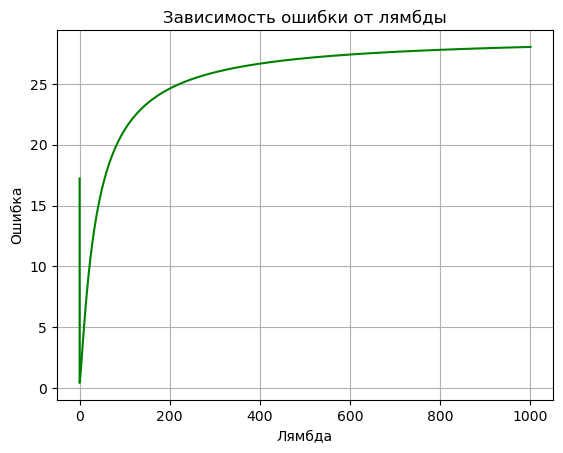

In [238]:
#Минимальная ошибка на тестовых данных наблюдалась при k=3 и составляла 0.3553464571518671

#Будем обучать нашу модель на обучающих данных, а ошибку считать относительно валидационных 
#Хотим найти такую лямбду, при которой ошибка на валидационных данных относительно обучающих минимальна
#Рассмотрим следующие графики зависимости ошибки от лямбды

mistakes1=[] #Массив для ошибок (в зависимости от лябмд)
lambdas1 = np.linspace(0, 1000, 10000)
for lam in lambdas1:
    result_reg1=count_result_reg(X_ntrain, y_ntrain, 6, lam) #Для каждой лямбды находим псевдорешение на обучающих данных
    mistakes1.append(count_mist(X_nvalid, y_nvalid, result_reg1)) #Для каждого псевдорешения считаем ошибку относительно валидационных данных
    
plt.grid()
regular1=plt.plot(lambdas1, mistakes1, 'g')
plt.title('Зависимость ошибки от лямбды')
plt.xlabel('Лямбда')
plt.ylabel('Ошибка')
plt.show()

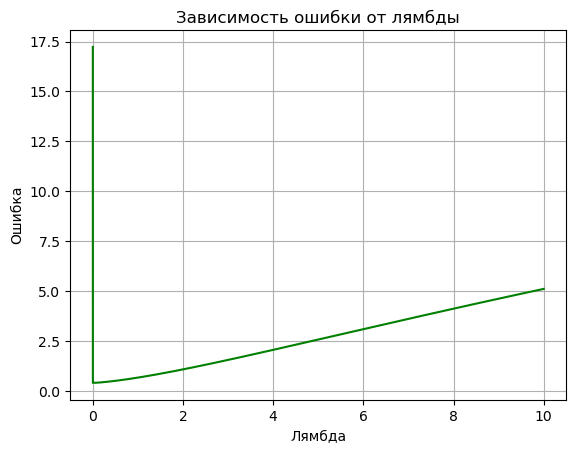

In [239]:
mistakes2=[] #Массив для ошибок (в зависимости от лябмд)
lambdas2 = np.linspace(0, 10, 10000)
for lam in lambdas2:
    result_reg2=count_result_reg(X_ntrain, y_ntrain, 6, lam) #Для каждой лямбды находим псевдорешение на обучающих данных
    mistakes2.append(count_mist(X_nvalid, y_nvalid, result_reg2)) #Для каждого псевдорешения считаем ошибку относительно валидационных данных
    
plt.grid()
regular2=plt.plot(lambdas2, mistakes2, 'g')
plt.title('Зависимость ошибки от лямбды')
plt.xlabel('Лямбда')
plt.ylabel('Ошибка')
plt.show()

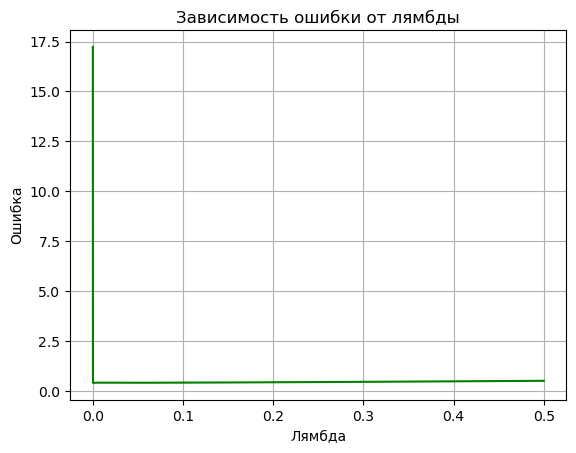

In [240]:
mistakes3=[] #Массив для ошибок (в зависимости от лябмд)
lambdas3 = np.linspace(0, 0.5, 10000)
for lam in lambdas3:
    result_reg3=count_result_reg(X_ntrain, y_ntrain, 6, lam) #Для каждой лямбды находим псевдорешение на обучающих данных
    mistakes3.append(count_mist(X_nvalid, y_nvalid, result_reg3)) #Для каждого псевдорешения считаем ошибку относительно валидационных данных
    
plt.grid()
regular3=plt.plot(lambdas3, mistakes3, 'g')
plt.title('Зависимость ошибки от лямбды')
plt.xlabel('Лямбда')
plt.ylabel('Ошибка')
plt.show()

In [242]:
#С помощью данных графиков мы увидели, что лямбда, дающая наименьшую ошибку, примерно равна 0.2 
lam_opt=0.2

#При данной лямбде найдем ошибку на тестовых данных относительно обучающих 
#В данном случае ошибка равна 0.3174069098636667, что меньше минимальной ошибки без регуляризации
result_reg_train=count_result_reg(X_ntrain, y_ntrain, 6, lam_opt) 
mist_least_train=count_mist(X_ntest, y_ntest, result_reg_train)
print("Ошибка на тестовых данных относительно обучающих равна", mist_least_train)

Ошибка на тестовых данных относительно обучающих равна 0.3174069098636667


**4. [0.25 балла]** Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$. Теоретически объясните полученный результат, доказав, что $\det(X^TX+\lambda E) > 0$ при $\lambda>0$.

In [243]:
#Построим матрицу и посчитаем определители для обучающих данных

X=np.vander(X_ntrain, 7, increasing=True)
E=np.identity(len(X[0]))
det_ord = np.linalg.det(np.dot(np.transpose(X), X))
det_reg = np.linalg.det(np.dot(np.transpose(X), X)+lam_opt*E)

print("Определитель на обучающих данных без регуляризации равен", det_ord)
print("Определитель на обучающих данных с регуляризацией равен", det_reg)

Определитель на обучающих данных без регуляризации равен 2.679998978619261e-15
Определитель на обучающих данных с регуляризацией равен 0.09963163211183405


Мы видим, что определитель при регуляризации в разы превышает определтель без регуляризации.
Заметим, что $G=Х^TX$ - это матрица Грама, где в качестве векторов выступают столбцы матрицы Х. Вычеркиванием строки и столбца с одинаковыми номерами из данной матрицы мы получаем матрицу Грама, где в качестве векторов выступают все столбцы матрицы Х, кроме вычеркнутого столбца. Следовательно, определители таких матриц неотрицательны.

Когда мы подсчитываем матрицу $G' = X^TX+\lambda E$, мы к i-той строчке матрицы $X^TX$ прибавляем строку (0, ..., 0, $\lambda$, 0, ..., 0) - на i-том месте в ней стоит лямбда. Тогда воспользуемся свойством определителя: $det(A_{1},..., A_{i}+A_{k}, ..., A_{n})= det(A_{1},..., A_{i}, ..., A_{n}) + det(A_{1},..., A_{k}, ..., A_{n})$, где $A_{i}$ - i-тая строчка матрицы A.

Разложив определитель матрицы $G'$ таким образом на определители, в которых ни одна строка не является суммой двух других, мы получим следующее:

$det(G')=det(G)+det(G_{E_{(1)}})+det(G_{E_{(2)}})+...+det(G_{E_{(2^n-1)}})+det(\lambda E)$, где $G_{E_{(i)}}$ - это матрица G, в которой одна или несколько строк заменены на соответствующие (с теми же номерами) строки матрицы $\lambda E$

Определители $det(G_{E_{(i)}})$ мы разложим (один или несколько раз) по тем строкам, в которых единственный ненулевой элемент - это лямбда:
$det(G')=det(G)+\lambda(det(G_{1})+det(G_{2})+...+det(G_{2^n-1}))+det(\lambda E)$, где $G_{i}$ - это матрица G, из которой вычеркнули одну или несколько строк, вставленных из матрицы $\lambda E$ (здесь при лямбде везде будет стоять единица в четной степени, поскольку лямбда стоит на месте диагонального элемента, у которого сумма i+j четная; следовательно, все эти слагаемые войдут в нашу формулу со знаком "+").

Как было сказано ранее, определители таких "усеченных" матриц тоже неотрицательны. Итак, получаем, что первое слагаемое и второе слагаемое (лямбда, умноженная на скобку) неотрицательны. Прм этом последнее слагаемое строго положительно: это определитель диагональной матрицы, где на диагонали стоят положительны лямбды => $det(\lambda E)=\lambda^n>0$.

Следовательно, $det(G')>0$, чтд.

**5. [0.25 балла]** Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без.

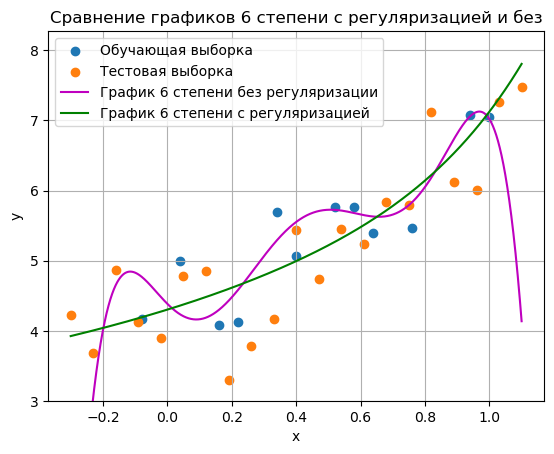

In [247]:
plt.grid()
train_graph = plt.scatter(X_ntrain, y_ntrain, label="Обучающая выборка")
test_graph = plt.scatter(X_ntest, y_ntest, label="Тестовая выборка")

graph_ord = plt.plot(x_funcs, y6, 'm', label="График 6 степени без регуляризации")

y6_reg=count_poly(result_reg_train, x_funcs)
graph_reg = plt.plot(x_funcs, y6_reg, 'g', label="График 6 степени с регуляризацией")

plt.ylim(bottom=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Сравнение графиков 6 степени с регуляризацией и без")

plt.legend()
plt.show()

**6. [0.25 балла]** Чем первый из них выгодно отличается от второго?

График с регуляризцией больше похож на тренд, который сможет объяснить закономерности на последующих выборках. Он не принимает во внимание "особенности" обучающих или тестовых данных, а является для них искомым обобщением (в отличие графика без регуляризации, на котрором, скорее всего, наблюдается эффект переобучения на обучающей выборке). 

**7. [0.75 балла]** Пусть заданы $X\in \text{Mat}_{n \times k}(\mathbb{R})$ ($k \leqslant n$), $y \in \mathbb{R}^n$, $\lambda \geqslant 0$, а также известно, что $\text{rk}~X = k$. Решите теоретически следующую задачу оптимизации:
$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min\limits_{a \in \mathbb{R}^k}.$$
(То есть найдите все векторы $a \in \mathbb{R}^k$, для которых выражение слева принимает наименьшее возможное значение.) В частности, докажите существование решений и укажите их количество в зависимости от входных данных.

Распишем "целевую функцию" более подробно: каждое слагаемое - это квадрат длины вектор-столбца, т.е. сумма квадратов координат этого вектора. Эту длину можно получить, если перемножить транспонированный вектор (т.е. вектор-строку) на себя (на вектор-столбец). Так и сделаем:

$|Xa-y|^2 + \lambda |a|^2 = (Xa-y)^T(Xa-y) + \lambda a^Ta = (a^TX^T - y^T)(Xa-y) + \lambda a^Ta = a^TX^TXa - a^TX^Ty - y^TXa + y^Ty + \lambda a^Ta (*)$

Заметим, что $a^TX^Ty$ - это произведение строки $a^T$ на столбец $X^Ty$, т.е. скаляр. Если мы его транспонируем, то получим тот же самый скаляр, то есть $(a^TX^Ty)^T = a^TX^Ty$  

При этом: $(a^TX^Ty)^T=y^TXa \implies a^TX^Ty = y^TXa \implies$ перепишем нашу формулу $(*)$ в более простом виде:

$|Xa-y|^2 + \lambda |a|^2 = a^TX^TXa - 2y^TXa  + y^Ty + \lambda a^Ta$

Теперь продифференцируем полученную фомулу по а и приравняем к 0 для нахождения минимума. Затем немного преобразуем:

$2a^TX^TX - 2y^TX + 2\lambda a^T =0 |:2 $

Заметим, что $\lambda a^T = \lambda a^TE \implies a^TX^TX + \lambda a^TE =y^TX \implies a^T(X^TX + \lambda E) = y^TX $

Теперь транспонируем все выражение целиком:
$((X^TX)^T + (\lambda E)^T))a = X^Ty $

Заметим, что $(X^TX)^T = X^TX;  (\lambda E)^T = \lambda E \implies (X^TX + \lambda E)a = X^Ty$

Наконец, домножим обе части выражения на $(X^TX + \lambda E)^{-1}$ слева и получим искомую формулу:
$a = (X^TX + \lambda E)^{-1}X^Ty$

Заметим, что эта формула в точности совпадает с формулой из шапки данного задания. На выходе мы получаем вектор из k элементов.

Из пункта 4 данного номера знаем, что $det(X^TX+\lambda E) = det(G)+\lambda(det(G_{1})+det(G_{2})+...+det(G_{n}))+det(\lambda E) (**)$

Поскольку $rkX=k$, в матрице Х все столбцы линейно независимы. При этом $X^TX$ - это матрица Грама для столбцов матрицы Х. Знаем, что в таком случае $det(X^TX)>0 \implies det(X^TX+\lambda E)>0$ (в формуле $(**)$ первое слагаемое положительное, все остальные неотрицательные).

Следовательно, матрица $X^TX+\lambda E$ обратима, и решение, т.е. вектор а, существует и единственно.

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

**8. [0.25 балла]** Попробуйте объяснить, почему регуляризовать (штрафовать за слишком большую абсолютную величину) коэффициент при константном признаке (который состоит из одних единиц) — плохая идея.

Разумеется, всен зависит от конкретных задач и данных, но вообще может сложиться ситуация, в которой наши параметры не "покрывают" 100% значения для каждого набора аргументов. 

Так, например, случилось бы, если бы мы в нашей модели для квартир убрали бы общую и жилую площади как параметры. Тогда площадь кухни, расстояние до центра и время для метро, очевидно, не были бы самыми важными параметрами модели и не "покрывали" бы 100% цены квартиры, потому что она по большей части зависит от площади. 

Тогда большая доля значения приходилась бы на константный признак (он выступал бы в роли слагаемого дя всех неучтенных параметров). При этом даже очень грамотно составленна модель не защищена полностью от больших значений константного признака: дело в том, что каждая выборка уникальна, и чтобы очень точно описать закономерности в ней, потребуютя, возможно, сотни тысяч параметров. Понятно, что в реальной жизни люди не могут учесть абсолютно все параметры, поэтому остаются такие константные признаки как суммы всего неучтенного.

С одной стороны, при регуляризации данного признака решений может вообще не не быть. С другой стороны (поскольку мы не знаем точно, что "скрывается" за константным признаком) при его регуляризации модель может начать объяснять совсем другие закономерности, а не то, что мы хотели изначально.

Наконец, данный признак на то и константный, что он будет одним и тем же для всех набров аргументов и значений во всех выборках. Регуляризовывать его нет смысла: если мы штрафуем за его величину, то мы как будто утверждаем, что в идеале наша целевая функция близка к нулю и ее не нужно никуда смещать.

**9. [0.5 балла]** Пусть теперь $\text{rk}~X < k$. Всегда ли в этом случае существует решение? Если существует, то является ли оно единственным? Ответ обоснуйте.

Заметим, что $(X^TX + \lambda E)a = X^Ty$ - обычня СЛУ: $X^TX + \lambda E$ - матрица коэффициентов, а - столбец неизвестных, $X^Ty$ - столбец правых частей. 

Если $rkX<k$, то в матрице Х есть линейно зависимые столбцы. Мы знаем, что определитель матрицы, в которой есть линейно зависимые строки/столбцы, равен 0. Это коснется как матрицы $G$, так и матриц $G_{i}$. 

Следовательно, в нашей формуле $det(G')=det(G)+\lambda(det(G_{1})+det(G_{2})+...+det(G_{2^n-1}))+det(\lambda E)$ все слагаемые, кроме последнего, могут занулиться. Если и лямбда равна 0, то весь определитель равен 0 и матрица $G'$ необратима. 

Также мы знаем, что СЛУ имеет единственное решение тогда и только тогда, когда определитель матрицы коэффициентов не равен 0; в противном случае решений либо нет, либо их бесконечно много.

Следовательно, здесь возможны 2 сценария:
1) решений нет

2) решений бесконечно много

**10. [0.25 балла]** Покажите теоретически, что если решений бесконечно много, то среди них обязательно найдутся решения со сколь угодно большими по модулю компонентами вектора $a$. Почему большие веса в линейной модели — плохо?

Пусть у нас имеется бесконечно много решений, и w1, w2 - какие-то два из них. 
Тогда: $Xw_1=y, Xw_2=y \implies X(w_1-w_2)=Xw_1-Xw_2=y-y=0$ (здесь 0 - не скаляр, а нулевой вектор)

Тогда рассмотрим вектор $w_3 = m(w1-w2) + w1$. Заметим, что: $Xw_3 = X(m(w1-w2) + w1) = m* X(w_1-w_2) + Xw_1= m*0 + y = y$, т.е. $w_3$ - тоже решение. Назначая m сколь угодно большим, мы получим сколь угодно большие компоненты вектора а.

Если в модели есть большие веса, то выведенная нами функция будет сильно изменяться даже при маленьких изменениях параметров, при которых стоят большием коэффициенты. Следовательно, наша функци будет переобучена и корректно объяснять какие-то выборки, кроме обучающей, не будет.

### Задание 4. Онлайн-обучение линейной регрессии (3 балла)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Обозначим $X_{(t)} = (x_1\ldots x_t)^T$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

**1. [1 балл]** И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$, и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$. Опишите ваш алгоритм теоретически и обоснуйте его сложность.

Допустим, $x_{i}=[x_{i1}, x_{i2}, ..., x_{ik}]$ - это одномерный массив длины $k, k\geq 1$ (т.е. массив, в котором записано k некоторых параметров нашей модели). Тогда в $X$ записаны $x_{i}$, и это СТРОКИ, а в $X^T$ записаны $x^T_{i}$, и это СТОЛБЦЫ. 

Следовательно, при перемножении матриц $X^T_{(t)}X_{(t)}$ мы фактически умножаем строку (столбцов) на столбец (строк): $X^T_{(t)}X_{(t)}=(x^T_{1}, x^T_{2}, ..., x^T_{t})(x_{1}, x_{2}, ..., x_{t})^T$. 

Как известно, при умножении строки на столбец мы получаем сумму произведений соответствующих пар элементов. В частности, если мы умножаем строку скаляров на столбец скаляров, то получаем просто скаляр. 

Однако в нашем случае элементы - не скаляры, а столбцы и строки. Каждое слагаемое в итоговой сумме - это произведение столбца и строки (состоящих уже из обычных скаляров), т.е. матрица: $X^T_{(t)}X_{(t)} = x^T_{1}x_{1} + x^T_{2}x_{2} +...+x^T_{t}x_{t}$. Заметим, что размер данной матрицы равен $k\times k$ (не зависит от t).


Следовательно, $X^T_{(t)}X_{(t)}$ - это сумма t матриц, и мы можем ее хранить в памяти.

Пусть нам добавили пару $(x_{t+1}, y_{t+1})$. Если бы мы не оптимизировали решение, а считали в лоб, то пришлось бы строить новые матрицы: $X_{(t+1)}=(x_{1}, x_{2}, ..., x_{t}, x_{t+1})^T, X^T_{(t+1)}=(x^T_{1}, x^T_{2}, ..., x^T_{t}, x^T_{t+1})$.

Тогда их произведение тоже было бы равно сумме матриц, но уже в количестве $t+1$ штук, при том сумма первых $t$ матриц была бы в точности равна $X^T_{(t)}X_{(t)}$:
$X^T_{(t+1)}X_{(t+1)} = (x^T_{1}, x^T_{2}, ..., x^T_{t}, x^T_{t+1})(x_{1}, x_{2}, ..., x_{t}, x_{t+1})^T= x^T_{1}x_{1} + x^T_{2}x_{2} +...+x^T_{t}x_{t} + x^T_{t+1}x_{t+1} = X^T_{(t)}X_{(t)} + x^T_{t+1}x_{t+1}$.

Значит, чтобы перейти от $X^T_{(t)}X_{(t)}$ к $X^T_{(t+1)}X_{(t+1)}$ при получении пары $(x_{t+1}, y_{t+1})$, нужно просто к имеющейся у нас в памяти матрице прибавить матрицу - произведение $x^T_{t+1}$ на $x_{t+1}$. 

Заметим, что данный алгоритм действительно не зависит от t, поскольку все задействованные матрицы (и слагаемые, и итоговые суммы) имеют фиксированный размер $k\times k$, не зависящий от t. Сложность данного действия равна O(k^2).

Теперь перейдем к подсчету $X^T_{(t+1)}y_{(t+1)}$.
Поскольку $y_{i}$ - это значения некоторых функций, это, очевидно, просто скаляры. Значит, $y_{(t)}$ - это столбец из t чисел.

Заметим, что когда мы перемножаем $X^T_{(t)}y_{(t)}$, мы, фактически, умножаем строку (столбцов) на столбец (скаляров).
Значит, в результате мы получим сумму t столбцов, умноженных на соответствующие скаляры:
$X^T_{(t)}y_{(t)} = (x^T_{1}, x^T_{2}, ..., x^T_{t})(y_{1}, y_{2}, ..., y_{t})^T = x^T_{1}y_{1} + x^T_{2}y_{2} + ... + x^T_{t}y_{t}$.

То есть здесь результат - это столбец, и мы можем хранить его в памяти.

Пусть нам добавили пару $(x_{t+1}, y_{t+1})$. Если бы мы не оптимизировали решение, а считали в лоб, то пришлось бы строить новую матрицу и столбец: $X^T_{(t+1)}=(x^T_{1}, x^T_{2}, ..., x^T_{t}, x^T_{t+1}), y_{(t+1)}=(y_{1}, y_{2}, ..., y_{t}, y_{t+1})^T$.

Тогда их произведение тоже было бы равно сумме столбцов, домноженных на скаляры, но уже в количестве $t+1$ штук. При том сумма первых $t$ столбцов была бы в точности равна $X^T_{(t)}y_{(t)}$:
$X^T_{(t+1)}y_{(t+1)} = (x^T_{1}, x^T_{2}, ..., x^T_{t}, x^T_{t+1})(y_{1}, y_{2}, ..., y_{t}, y_{t+1})^T = x^T_{1}y_{1} + x^T_{2}y_{2} + ... + x^T_{t}y_{t} + x^T_{t+1}y_{t+1} = X^T_{(t)}y_{(t)} + x^T_{t+1}y_{t+1}$.

Значит, чтобы перейти от $X^T_{(t)}y_{(t)}$ к $X^T_{(t+1)}y_{(t+1)}$ при получении пары $(x_{t+1}, y_{t+1})$, нужно просто к имеющемуся у нас в памяти столбцу прибавить столбец - произведение $x^T_{t+1}$ на $y_{t+1}$. 

Заметим, что данный алгоритм действительно не зависит от t, поскольку все задействованные столбцы (и слагаемые, и итоговые суммы) имеют фиксированный размер $k\times 1$, не зависящий от t. Сложность данного действия равна O(k).\

Тогда сложность итогового алгоритма равна O(k^2+k)=O(k^2).

**2. [2 балла]** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(5x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

Заметим, что в данном случае нам предоставляются не одномерные массивы, а просто числа. Чтобы из переданной координаты x сделать одномерный массив $x_{i}$, мы создадим массив степеней от 0 до 5 переданного числа х (и обернем это действие в отдельную функцию).

In [248]:
def degrees(num): #Создаем массив степеней переданного числа х
    mass=np.zeros((1, 6))
    for i in range(0, 6):
        mass[0][i]=num**i
    return mass  

def count_poly_sim(coeffs, args):
    values = []
    for arg in args:
        num = coeffs[0][0]
        for i in range(1, 6):
            num+=coeffs[i][0]*arg**i
        values.append(num)
    return values

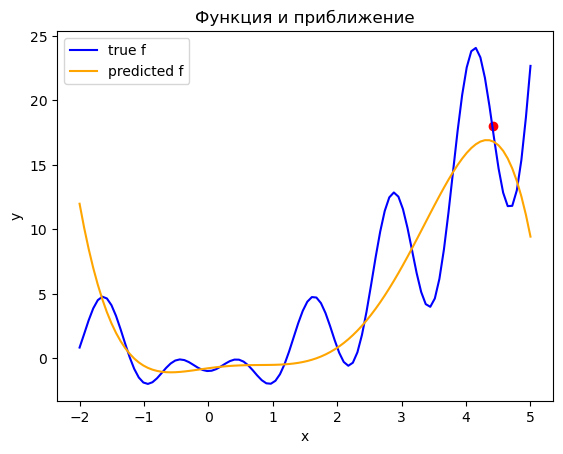

In [250]:
from IPython.display import clear_output

f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1 # this is the true function

# We need this to make the plot of f_true:
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))
y_grid = f_true(x_grid)

X_matrix=np.zeros((6, 6))
X_column=np.zeros((6, 1))

for i in range(200):
    x_last = np.random.uniform(-2, 5)
    y_last = f_true(x_last) + 2*np.random.randn()
    
    # the rest of the code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.plot(x_grid,y_grid, color='blue', label='true f')
        plt.scatter(x_last, y_last, color='red')
        
        Xi=degrees(x_last)
        Xi_tr = Xi.reshape(6, 1)
    
        X_matrix += np.dot(Xi_tr, Xi)
        
        X_column+=y_last*Xi_tr
        
        result_sim=np.dot(np.linalg.inv(X_matrix), X_column)
    
        y_pred = count_poly_sim(result_sim, x_grid)
        
        plt.plot(x_grid, y_pred, color='orange', label='predicted f')
        
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title("Функция и приближение")
        plt.legend(loc='upper left')
        plt.show()

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ — матрица с ортонормированными столбцами, а $R$ — верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ — столбцы матрицы $A$, $q_1,\ldots,q_t$ — столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ — это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.